In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('clean_datset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
##Encoding

df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## independent and depnedent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
##trin tesst spliy
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
## feature selection based on correlation
X_train.corr()   ## try to remove highly positive corelted features

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


why we shoud try to remove highly postively corelted features?? in training a ml model

In most ML pipelines, highly positively correlated features are redundant. Keeping all of them usually adds noise and instability rather than useful information. Here’s the precise reasoning 👇

1️⃣ Multicollinearity → Unstable Models

When two (or more) features are strongly positively correlated, they carry almost the same signal.

Problem:

Linear models (Linear Regression, Logistic Regression) can’t clearly decide which feature deserves how much weight

Coefficients become unstable (small data change → large coefficient change)

📌 Result:
Model looks accurate but is unreliable and hard to interpret.

2️⃣ No New Information (Redundancy)

Example:

height_cm

height_in_meters

Correlation ≈ 1.0

Keeping both:

Does not improve learning

Increases dimensionality unnecessarily

📌 ML models learn from information, not from duplicated columns.

3️⃣ Overfitting Risk (Especially on Small Data)

Highly correlated features:

Let the model memorize patterns instead of learning general rules

Inflate variance

📌 Especially dangerous when:

Dataset is small

Model is complex (polynomial regression, neural nets)

4️⃣ Slower Training & Poor Generalization

More features ⇒

Larger parameter space

Slower convergence

Worse performance on unseen data

📌 Removing correlated features:

Simplifies hypothesis space

Improves generalization

5️⃣ Interpretability Suffers

If two features say the same thing:

Feature importance becomes misleading

Business explanations break

Example:

“Income is important”
vs
“Income AND salary AND annual_pay are important”

📌 Stakeholders want one clear driver, not three copies.

6️⃣ Model-Specific Impact (Important)
Model Type	Should Remove Correlated Features?
Linear / Logistic Regression	✅ Yes (Strongly)
Ridge Regression	⚠️ Less critical
Lasso Regression	❌ Auto-selects
Decision Trees	❌ Not required
Random Forest	⚠️ Sometimes
XGBoost / LightGBM	⚠️ Usually fine

📌 Trees split on one feature at a time, so correlation hurts less.

7️⃣ Practical Rule of Thumb

If |correlation| > 0.85–0.9 → consider dropping one

Keep the one that is:

More interpretable

Easier to measure

More stable over time

8️⃣ What to Do Instead of Blind Dropping

✔ Feature selection (VIF, Lasso)
✔ Dimensionality reduction (PCA)
✔ Domain-based feature choice

One-Line Summary

Highly positively correlated features don’t add information — they add instability, redundancy, and overfitting risk.

<Axes: >

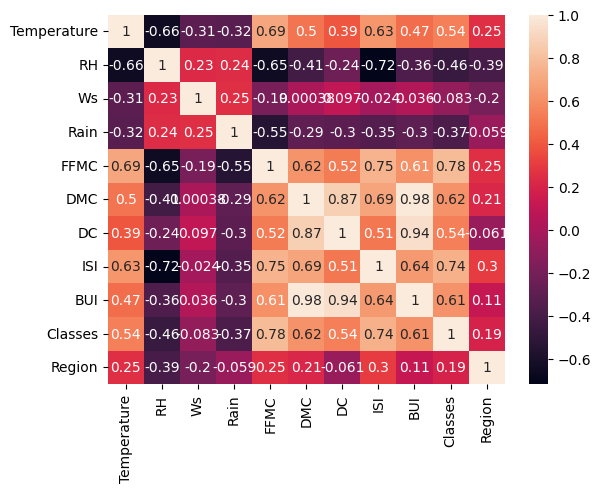

In [17]:
##check for multicollenarity

plt.Figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)#annot controls whether the numeric values are written on the heatmap cells.

In [18]:
##removing features which are highly corelated
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
#threshold is setted by domain expert
corr_features=correlation(X_train,.85)

In [20]:
##drop these features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((182, 9), (61, 9))

Feature scailing or Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [22]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'X_Train after scailing')

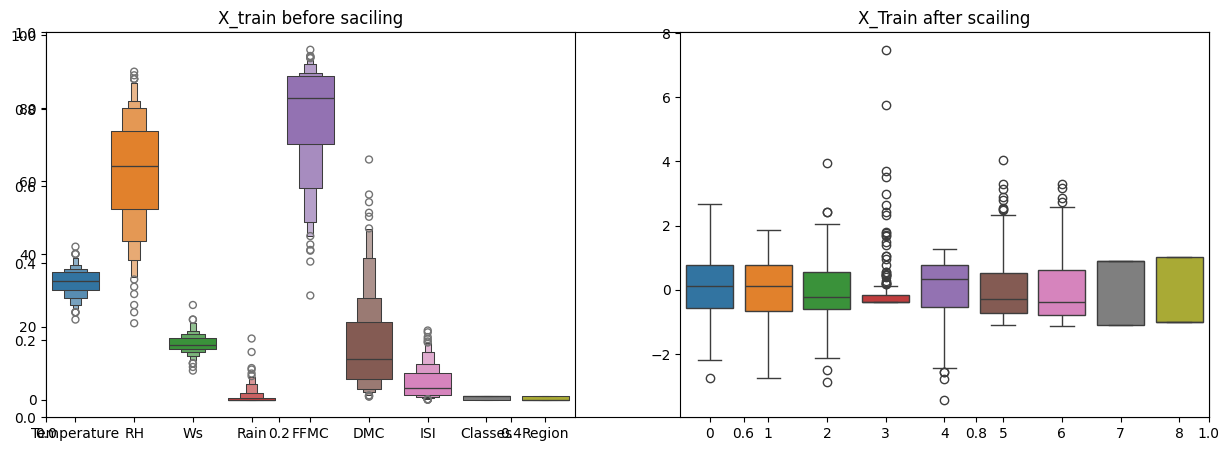

In [23]:
##Box plot to understand effect of standard scaller
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.title('X_train before saciling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_Train after scailing')


In [24]:
##linear regression

mean absolute  0.5468236465249978
rsqre 0.9847657384266951


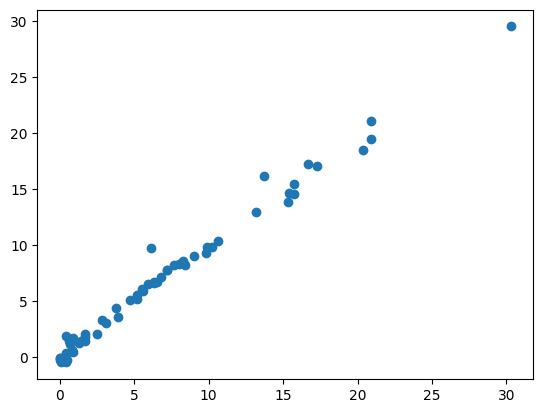

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,Y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)

In [26]:
#new data
new_df = pd.DataFrame({
    'Temperature': [30],
    'RH': [45],
    'Ws': [4.5],
    'Rain': [0],
    'FFMC': [85],
    'DMC': [120],
    
    'ISI': [5.2],
   
    'Classes': [0],   # dummy
    'Region': [1]     # dummy
})

new_df_scaled = scaler.transform(new_df)
prediction = linreg.predict(new_df_scaled)

print(prediction)


[37.3812091]


##lasso regression

mean absolute  1.1331759949144087
rsqre 0.9492020263112388


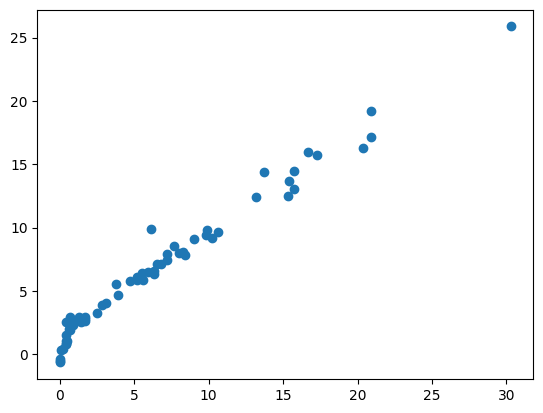

In [27]:
from sklearn.linear_model import Lasso
from sklearn .metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)





Ridge rgeression

mean absolute  0.5642305340105715
rsqre 0.9842993364555512


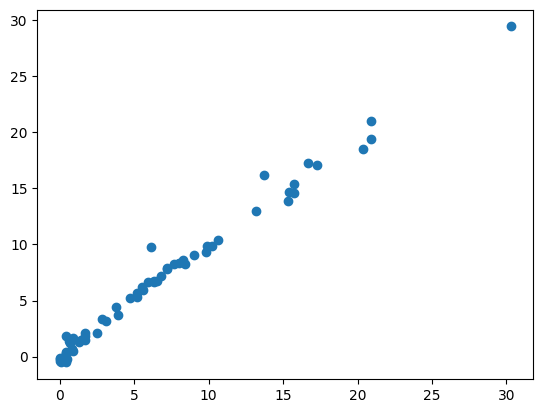

In [28]:
from sklearn.linear_model import Ridge
from sklearn .metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)

Elasticnet

mean absolute  1.8822353634895999
rsqre 0.8753460589519703


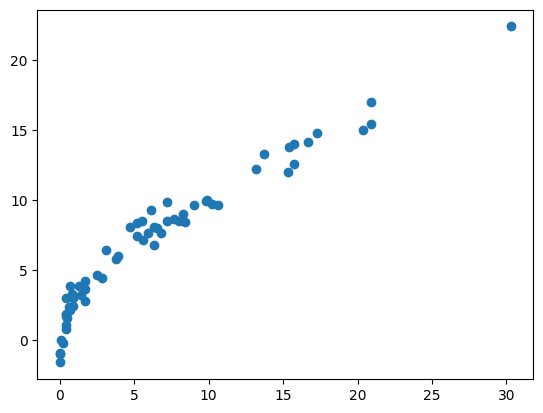

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn .metrics import mean_absolute_error,r2_score
elsticnet=ElasticNet()
elsticnet.fit(X_train_scaled,Y_train)
y_pred=elsticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)

corss validation wrt to Lasso

In [30]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
lassocv.predict(X_test_scaled)

array([ 8.16830389,  7.68147002, -0.23809698,  4.78348068,  6.80056553,
        1.8240148 ,  2.24891284,  7.65375452,  2.01837075,  3.43551694,
        0.65763521, 10.0012828 ,  9.37421682, 16.97541786, 18.25005429,
        1.67532586,  1.63417641, -0.73141894,  7.28096417,  3.12985293,
        2.00263648,  0.1674232 ,  6.47597673,  0.1299297 , 20.97550028,
        5.13544945,  5.85790118,  9.7488384 , -0.87894886,  9.92467295,
        6.71279503, -0.29032334, 10.29690182, 14.41231719,  1.75785569,
        0.89446894,  2.03030842,  5.98752495, -0.66008033, -0.60143063,
        6.46018173,  2.13349411,  8.46440838, -0.93165221, 15.40314151,
        8.32213695,  8.49346616,  1.4463523 , 13.02801863,  1.22072717,
       29.04392853,  5.51377627, 17.14332712, 19.2525866 , 13.68873198,
       16.02465131,  1.04280502,  9.09699018,  3.86335958, 14.44065137,
        5.24516066])

In [31]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [32]:
lassocv.mse_path_

array([[54.04680834, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139504, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mean absolute  0.6358894638564663
rsqre 0.9814406737205228


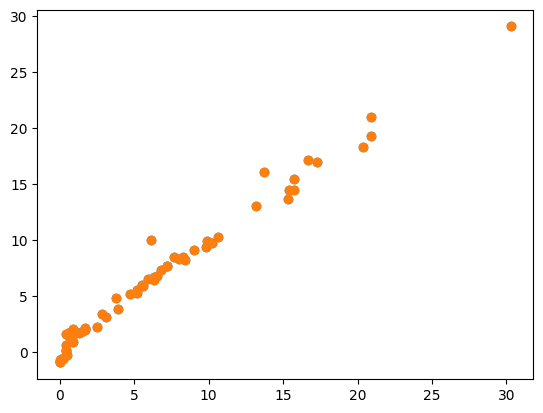

In [33]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)


mean absolute  0.5642305340105715
rsqre 0.9842993364555512


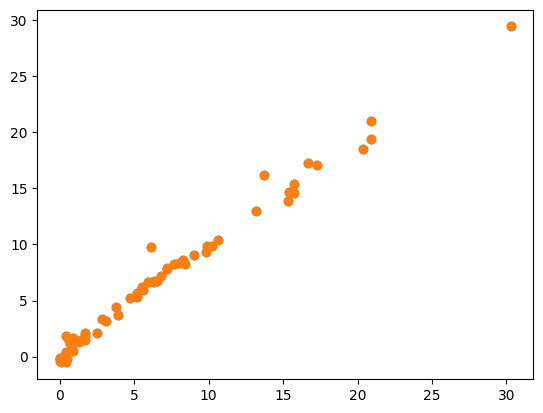

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)


mean absolute  0.6575946731430901
rsqre 0.9814217587854941


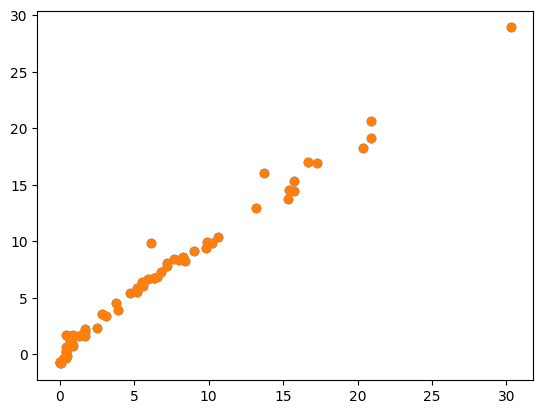

In [35]:
#elasitc cv
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,Y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score =r2_score(y_test,y_pred)
print ("mean absolute ",mae)
print ("rsqre",score)
plt.scatter(y_test,y_pred)

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))